In [1]:
# use conda env "geo_env"

import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
from datetime import datetime
import matplotlib.pyplot as plt
import os


#### Parameters

In [2]:
n_nodes = 6
data_dir = '/work_big/users/portal/CERRA-Land/'
geo_dir = '/home/zappa/ENCIRCLE/shapefiles'

#### Upload excel node files

In [3]:
# Upload the data
for node in range(1,n_nodes+1):
    globals()[f'df_{node}'] = pd.read_excel(data_dir+'CERRA_LAND_italy_3by2_sorted_by_PrMax.xlsx', sheet_name=node-1)
# Titles of the columns
column_titles = df_1.columns.tolist()
print(column_titles)

['Time', 'VDAo-A', 'VDAo-B', 'VDAo-C', 'VDAo-D', 'Piem-A', 'Piem-B', 'Piem-C', 'Piem-D', 'Piem-E', 'Piem-F', 'Piem-G', 'Piem-H', 'Piem-I', 'Piem-L', 'Piem-M', 'Ligu-A', 'Ligu-B', 'Ligu-C', 'Ligu-D', 'Ligu-E', 'Lomb-01', 'Lomb-02', 'Lomb-03', 'Lomb-04', 'Lomb-05', 'Lomb-06', 'Lomb-07', 'Lomb-08', 'Lomb-09', 'Lomb-10', 'Lomb-11', 'Lomb-12', 'Lomb-13', 'Lomb-14', 'Tren-A', 'Tren-B', 'Vene-A', 'Vene-B', 'Vene-C', 'Vene-D', 'Vene-E', 'Vene-F', 'Vene-G', 'Vene-H', 'Friu-A', 'Friu-B', 'Friu-C', 'Friu-D', 'Emil-A', 'Emil-B', 'Emil-C', 'Emil-D', 'Emil-E', 'Emil-F', 'Emil-G', 'Emil-H', 'Tosc-A1', 'Tosc-A2', 'Tosc-A3', 'Tosc-A4', 'Tosc-A5', 'Tosc-A6', 'Tosc-B', 'Tosc-C', 'Tosc-E1', 'Tosc-E2', 'Tosc-E3', 'Tosc-F1', 'Tosc-F2', 'Tosc-I', 'Tosc-L', 'Tosc-M', 'Tosc-O1', 'Tosc-O2', 'Tosc-O3', 'Tosc-R1', 'Tosc-R2', 'Tosc-S1', 'Tosc-S2', 'Tosc-S3', 'Tosc-T', 'Tosc-V', 'Umbr-A', 'Umbr-B', 'Umbr-C', 'Umbr-D', 'Umbr-E', 'Umbr-F', 'Marc-1', 'Marc-2', 'Marc-3', 'Marc-4', 'Marc-5', 'Marc-6', 'Abru-A', 'Abru-B'

#### Upload shapefiles

In [4]:
# shape file intput of warning regions
shapef_path = os.path.join(geo_dir,"ZA_2017_ID_v4_geowgs84.shp")
shape_gdf = gpd.read_file(shapef_path)
shape_titles = shape_gdf.columns.tolist()
# print(shape_titles)
# print(shape_gdf.head())
# subregional / regional info
region_titles = shape_gdf['Regione'].unique()
subregion_cod = np.array(shape_gdf['Cod_DPC'])
region_cod, ind_list = np.unique([cod[:4] for cod in subregion_cod], return_index=True)
region_cod = [cod[:4] for cod in subregion_cod[np.sort(np.array(ind_list))]]
subregion_area = shape_gdf['area_kmq']
print(subregion_cod)
print(region_titles)
print(region_cod)

['VDAo-A' 'VDAo-B' 'VDAo-C' 'VDAo-D' 'Piem-A' 'Piem-B' 'Piem-C' 'Piem-D'
 'Piem-E' 'Piem-F' 'Piem-G' 'Piem-H' 'Piem-I' 'Piem-L' 'Piem-M' 'Ligu-A'
 'Ligu-B' 'Ligu-C' 'Ligu-D' 'Ligu-E' 'Lomb-01' 'Lomb-02' 'Lomb-03'
 'Lomb-04' 'Lomb-05' 'Lomb-06' 'Lomb-07' 'Lomb-08' 'Lomb-09' 'Lomb-10'
 'Lomb-11' 'Lomb-12' 'Lomb-13' 'Lomb-14' 'Tren-A' 'Tren-B' 'Vene-A'
 'Vene-B' 'Vene-C' 'Vene-D' 'Vene-E' 'Vene-F' 'Vene-G' 'Vene-H' 'Friu-A'
 'Friu-B' 'Friu-C' 'Friu-D' 'Emil-A' 'Emil-B' 'Emil-C' 'Emil-D' 'Emil-E'
 'Emil-F' 'Emil-G' 'Emil-H' 'Tosc-A1' 'Tosc-A2' 'Tosc-A3' 'Tosc-A4'
 'Tosc-A5' 'Tosc-A6' 'Tosc-B' 'Tosc-C' 'Tosc-E1' 'Tosc-E2' 'Tosc-E3'
 'Tosc-F1' 'Tosc-F2' 'Tosc-I' 'Tosc-L' 'Tosc-M' 'Tosc-O1' 'Tosc-O2'
 'Tosc-O3' 'Tosc-R1' 'Tosc-R2' 'Tosc-S1' 'Tosc-S2' 'Tosc-S3' 'Tosc-T'
 'Tosc-V' 'Umbr-A' 'Umbr-B' 'Umbr-C' 'Umbr-D' 'Umbr-E' 'Umbr-F' 'Marc-1'
 'Marc-2' 'Marc-3' 'Marc-4' 'Marc-5' 'Marc-6' 'Abru-A' 'Abru-B' 'Abru-C'
 'Abru-D1' 'Abru-D2' 'Abru-E' 'Moli-A' 'Moli-B' 'Moli-C' 'Lazi-A' 'Lazi-B'
 'Lazi

#### Plot shapefiles

FileNotFoundError: [Errno 2] No such file or directory: '/home/portal/script/python/precip_Cristina/figures/map_warning_regions_northitaly.png'

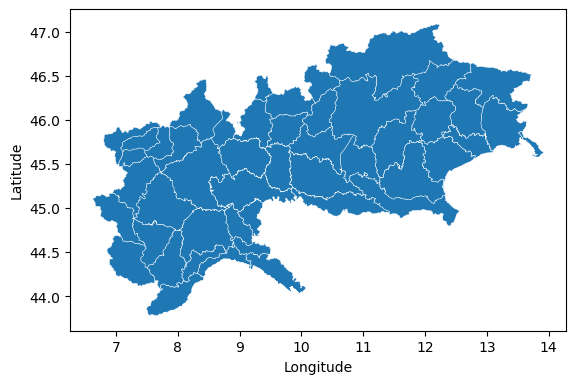

In [5]:
# Plot region selection
northitaly = ['Valle d\'Aosta', 'Piemonte', 'Liguria', 'Lombardia', 'Trentino Alto Adige', 'Veneto', 'Friuli Venezia Giulia']
centreintaly = ['Emilia Romagna','Toscana','Marche','Umbria', 'Lazio', 'Abruzzo']
southitaly = ['Molise', 'Campania', 'Puglia', 'Basilicata', 'Calabria', 'Sicilia', 'Sardegna']

for wideregion_name in ['northitaly', 'centreintaly', 'southitaly']:
    shape_reg = shape_gdf.loc[shape_gdf['Regione'].isin(globals()[wideregion_name])]
    # create figure showing shapefiles
    fig, ax = plt.subplots()
    shape_reg.plot(ax=ax,edgecolor='white', linewidth=0.3) 
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    fig.savefig(f"figures/map_warning_regions_{wideregion_name}", dpi=300)

    plt.show()

#### For each precipitation event in df_node add columns with: 
- 24h precipitation by single region
- 24h precipitation by wide region

In [6]:
# List of lists of single regions
list_of_single_regions = [[region] for region in region_titles]
# Lists of wide regions
regions_all = region_titles
regions_N = ['Valle d\'Aosta', 'Piemonte', 'Liguria', 'Lombardia', 'Trentino Alto Adige', 'Veneto', 'Friuli Venezia Giulia']
regions_C = ['Emilia Romagna','Toscana','Marche','Umbria', 'Lazio', 'Abruzzo']
regions_S = ['Molise', 'Campania', 'Puglia', 'Basilicata', 'Calabria', 'Sicilia', 'Sardegna']
list_of_wide_regions = [regions_N, regions_C, regions_S, regions_all]
names_of_wide_regions = ['N-Italy', 'C-Italy', 'S-Italy', 'Italy']
# Create a list of all lists
list_of_regions = list_of_single_regions + list_of_wide_regions
print(list_of_regions)
# Name for every list in list_of_regions
names_of_regions = [name[0] for name in list_of_single_regions] + names_of_wide_regions
print(names_of_regions)

[["Valle d'Aosta"], ['Piemonte'], ['Liguria'], ['Lombardia'], ['Trentino Alto Adige'], ['Veneto'], ['Friuli Venezia Giulia'], ['Emilia Romagna'], ['Toscana'], ['Umbria'], ['Marche'], ['Abruzzo'], ['Molise'], ['Lazio'], ['Campania'], ['Calabria'], ['Basilicata'], ['Puglia'], ['Sicilia'], ['Sardegna'], ["Valle d'Aosta", 'Piemonte', 'Liguria', 'Lombardia', 'Trentino Alto Adige', 'Veneto', 'Friuli Venezia Giulia'], ['Emilia Romagna', 'Toscana', 'Marche', 'Umbria', 'Lazio', 'Abruzzo'], ['Molise', 'Campania', 'Puglia', 'Basilicata', 'Calabria', 'Sicilia', 'Sardegna'], array(["Valle d'Aosta", 'Piemonte', 'Liguria', 'Lombardia',
       'Trentino Alto Adige', 'Veneto', 'Friuli Venezia Giulia',
       'Emilia Romagna', 'Toscana', 'Umbria', 'Marche', 'Abruzzo',
       'Molise', 'Lazio', 'Campania', 'Calabria', 'Basilicata', 'Puglia',
       'Sicilia', 'Sardegna'], dtype=object)]
["Valle d'Aosta", 'Piemonte', 'Liguria', 'Lombardia', 'Trentino Alto Adige', 'Veneto', 'Friuli Venezia Giulia', 'Emilia

In [7]:
# Weighed mean by region
for i, reg in enumerate(list_of_regions):
    # Convert from region titles to region codes
    reg_cod = [region_cod[region_titles.tolist().index(region)] for region in reg]
    # Find subregions_cod indices comprised within regions_cod
    ind_sreg_cod = np.array(
        [i for i, subregion in enumerate(subregion_cod) if subregion[:4] in reg_cod],
        dtype=int
    )
    sreg_cod = subregion_cod[ind_sreg_cod]
    # Compute area sum over reg
    sreg_area = np.array(subregion_area[ind_sreg_cod])
    reg_area = sum(sreg_area)
    print(reg,':',np.round(reg_area), 'km^2')
    # Compute weighted mean over reg for each precipitation event in node 1
    for node in range(1,n_nodes+1):
        df = globals()[f'df_{node}']
        reg_prec = (df[sreg_cod] * sreg_area).sum(axis=1) / sreg_area.sum()
        df[names_of_regions[i]] = reg_prec


["Valle d'Aosta"] : 3261.0 km^2
['Piemonte'] : 25387.0 km^2
['Liguria'] : 5416.0 km^2
['Lombardia'] : 23863.0 km^2
['Trentino Alto Adige'] : 13605.0 km^2
['Veneto'] : 18407.0 km^2
['Friuli Venezia Giulia'] : 7862.0 km^2
['Emilia Romagna'] : 22452.0 km^2
['Toscana'] : 22987.0 km^2
['Umbria'] : 8464.0 km^2
['Marche'] : 9401.0 km^2
['Abruzzo'] : 10831.0 km^2
['Molise'] : 4460.0 km^2
['Lazio'] : 17232.0 km^2
['Campania'] : 13671.0 km^2
['Calabria'] : 15222.0 km^2
['Basilicata'] : 10073.0 km^2
['Puglia'] : 19539.0 km^2
['Sicilia'] : 25832.0 km^2
['Sardegna'] : 24100.0 km^2
["Valle d'Aosta", 'Piemonte', 'Liguria', 'Lombardia', 'Trentino Alto Adige', 'Veneto', 'Friuli Venezia Giulia'] : 97801.0 km^2
['Emilia Romagna', 'Toscana', 'Marche', 'Umbria', 'Lazio', 'Abruzzo'] : 91367.0 km^2
['Molise', 'Campania', 'Puglia', 'Basilicata', 'Calabria', 'Sicilia', 'Sardegna'] : 112897.0 km^2
["Valle d'Aosta" 'Piemonte' 'Liguria' 'Lombardia' 'Trentino Alto Adige'
 'Veneto' 'Friuli Venezia Giulia' 'Emilia R

#### Order extremes based on maxima across wide regions

In [9]:
# For every node, order precip values considering Nmax maxima in wide regions
Nmax = 3
for node in range(1,n_nodes+1):
    df = globals()[f'df_{node}']
    df_events = pd.DataFrame(columns=['Index', 'Time', 'Wide region', 'Precipitation'])
    for i, reg in enumerate(list_of_wide_regions):
        ordered_index = df[names_of_wide_regions[i]].sort_values(ascending=False).index
        globals()[f'index_n{node}_{names_of_wide_regions[i]}'] = ordered_index[:Nmax]
        events_reg = np.array(df.loc[ordered_index,[names_of_wide_regions[i]]])
        # Create dataframe of maxima over the three wide regions
        if names_of_wide_regions[i] != 'Italy':
            # Append the new elements
            df_events = pd.concat([
                df_events, 
                pd.DataFrame({'Index': ordered_index[:Nmax], 'Time': df.loc[ordered_index[:Nmax],'Time'], 'Wide region': names_of_wide_regions[i], 'Precipitation': events_reg[:Nmax,0]})], 
                ignore_index=True)
        else:
            # Create dataframe of maxima over the three wide regions
            df_events_italy = pd.DataFrame({'Index': ordered_index[:Nmax*2], 'Time': df.loc[ordered_index[:Nmax*2],'Time'], 'Wide region': names_of_wide_regions[i], 'Precipitation': events_reg[:Nmax*2,0]})

                    
    # Group by 'Time' and keep only the maximum 'Precipitation' event for each 'Time'
    # Sort by "Precipitation" in descending order
    idx = df_events.groupby('Time')['Precipitation'].idxmax()
    df_events = df_events.loc[idx]
    df_events = df_events.sort_values(by='Precipitation', ascending=False)
    globals()[f'df_events_n{node}'] = df_events
    # Same for Italy
    df_events_italy = df_events_italy.sort_values(by='Precipitation', ascending=False)
    globals()[f'df_events_italy_n{node}'] = df_events_italy


# Save df_events to excel
# three wide regions
with pd.ExcelWriter(data_dir+f'events_on_wide_regions.xlsx', engine='openpyxl') as writer:
    for node in range(1,n_nodes+1):
        globals()[f'df_events_n{node}'].to_excel(writer, sheet_name='Node'+str(node), index=False)
# Italy
with pd.ExcelWriter(data_dir+f'events_on_Italy.xlsx', engine='openpyxl') as writer:
    for node in range(1,n_nodes+1):
        globals()[f'df_events_italy_n{node}'].to_excel(writer, sheet_name='Node'+str(node), index=False)


/tmp/ipykernel_2356663/161459907.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_events = pd.concat([
/tmp/ipykernel_2356663/161459907.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_events = pd.concat([
/tmp/ipykernel_2356663/161459907.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, excl